### Importing Libraries

In [1]:
import os
import numpy as np
import itertools
import json
from pprint import pprint
from copy import deepcopy
import pandas as pd
from tqdm.notebook import tqdm
import gensim

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 

import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from collections import Counter
from sklearn.manifold import TSNE

from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/swathipathaikara/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/Users/swathipathaikara/Desktop/DCSI/MlTrialPgms/ObjectDetection/action/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


### Reading the CSV file which is pre-processed with jsonTocsv.ipynb Actual Research perpers are JSON files (Document 3)

In [2]:
consolidatedData = pd.read_csv('/Users/swathipathaikara/Desktop/DCSI/Optimization/consolidatedData.csv')

### Cleaning the 'Abstract' cloumn which is decided for topic modelling

In [3]:
consolidatedData = pd.DataFrame(consolidatedData.dropna(subset=['abstract']))

In [42]:
consolidatedData = pd.DataFrame(consolidatedData['abstract'].str.replace("\n"," "))
consolidatedData = pd.DataFrame(consolidatedData['abstract'].str.replace("u03b1"," "))
consolidatedData = pd.DataFrame(consolidatedData['abstract'].str.replace("Abstract"," "))
consolidatedData = pd.DataFrame(consolidatedData['abstract'].str.replace("abstract"," "))
consolidatedData = pd.DataFrame(consolidatedData['abstract'].str.replace("α","a"))
consolidatedData = pd.DataFrame(consolidatedData['abstract'].str.replace("ł","l"))
consolidatedData = pd.DataFrame(consolidatedData['abstract'].str.replace("Rizal"," "))
consolidatedData = pd.DataFrame(consolidatedData['abstract'].str.replace("Citation"," "))
consolidatedData = pd.DataFrame(consolidatedData['abstract'].str.replace("Ahmad"," "))
consolidatedData = pd.DataFrame(consolidatedData['abstract'].str.replace("object"," "))
consolidatedData = pd.DataFrame(consolidatedData['abstract'].str.replace("Introduction"," "))
consolidatedData = pd.DataFrame(consolidatedData['abstract'].str.replace("Marpani"," "))
consolidatedData = pd.DataFrame(consolidatedData['abstract'].str.replace("Anak"," "))
consolidatedData = pd.DataFrame(consolidatedData['abstract'].str.replace("Dilol"," "))
consolidatedData = pd.DataFrame(consolidatedData['abstract'].str.replace("Objective"," "))
consolidatedData = pd.DataFrame(consolidatedData['abstract'].str.replace("Lim"," "))
consolidatedData = pd.DataFrame(consolidatedData['abstract'].str.replace("Name"," "))
consolidatedData = pd.DataFrame(consolidatedData['abstract'].str.replace("Braz"," "))
consolidatedData = pd.DataFrame(consolidatedData['abstract'].str.replace("Length"," "))
consolidatedData = pd.DataFrame(consolidatedData['abstract'].str.replace("Mohamad"," "))
consolidatedData = pd.DataFrame(consolidatedData['abstract'].str.replace("Pauzi"," "))

In [43]:
stopwords = set(STOPWORDS)

def displayWordcloud(abstractdata, title = None):
    abstractwordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=35, 
        scale=5,
        random_state=1
    ).generate(str(abstractdata))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=14)
        fig.subplots_adjust(top=2.3)

    plt.imshow(abstractwordcloud)
    plt.show()

/Users/swathipathaikara/Desktop/DCSI/MlTrialPgms/ObjectDetection/action/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/Users/swathipathaikara/Desktop/DCSI/MlTrialPgms/ObjectDetection/action/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/Users/swathipathaikara/Desktop/DCSI/MlTrialPgms/ObjectDetection/action/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/Users/swathipathaikara/Desktop/DCSI/MlTrialPgms/ObjectDetection/action/l

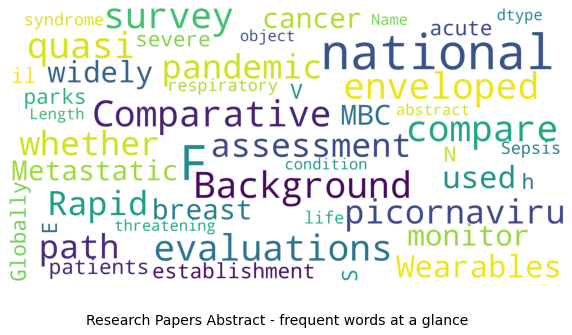

In [44]:
displayWordcloud(consolidatedData['abstract'], title = 'Research Papers Abstract - frequent words at a glance')

In [45]:
abstractdf = consolidatedData
abstractdf = abstractdf.abstract.dropna()
abstractData = abstractdf.values.tolist()

In [46]:
abstractData[:1]

['   Comparative evaluations of national survey data can improve future survey design and sampling strategies thereby enhancing our ability to detect important population level trends. This paper presents differences in past year estimates of alcohol, cigarette, marijuana, and non-medical painkiller use prevalence by age, sex, and race/ ethnicity between the 2012 National Survey on Drug Use and Health (NSDUH) and the National Epidemiologic Survey on Alcohol and Related Conditions (NESARC-III) administered in 2012-2013. In general, estimates were higher for the NSDUH survey, but patterns of substance use prevalence were similar across race/ethnicity, age, and sex. Results show most significant differences in estimates, across substances, age groups, and sex were greatest among Hispanics, followed by non-Hispanic Whites, and non-Hispanic Blacks. Members of other racial/ethnic groups (e.g., Asian-American, Native American/Alaskan Native) were underrepresented in the NSDUH survey. In many 

### Text Pre-processing

### Breaking to words

In [47]:
def sentencesToWords(abstractSentences):
    for abstractSentence in abstractSentences:
        yield(gensim.utils.simple_preprocess(str(abstractSentence), deacc=True))  

abstractDataWords = list(sentencesToWords(abstractData))

print(abstractDataWords[0])

['comparative', 'evaluations', 'of', 'national', 'survey', 'data', 'can', 'improve', 'future', 'survey', 'design', 'and', 'sampling', 'strategies', 'thereby', 'enhancing', 'our', 'ability', 'to', 'detect', 'important', 'population', 'level', 'trends', 'this', 'paper', 'presents', 'differences', 'in', 'past', 'year', 'estimates', 'of', 'alcohol', 'cigarette', 'marijuana', 'and', 'non', 'medical', 'painkiller', 'use', 'prevalence', 'by', 'age', 'sex', 'and', 'race', 'ethnicity', 'between', 'the', 'national', 'survey', 'on', 'drug', 'use', 'and', 'health', 'nsduh', 'and', 'the', 'national', 'epidemiologic', 'survey', 'on', 'alcohol', 'and', 'related', 'conditions', 'nesarc', 'iii', 'administered', 'in', 'in', 'general', 'estimates', 'were', 'higher', 'for', 'the', 'nsduh', 'survey', 'but', 'patterns', 'of', 'substance', 'use', 'prevalence', 'were', 'similar', 'across', 'race', 'ethnicity', 'age', 'and', 'sex', 'results', 'show', 'most', 'significant', 'differences', 'in', 'estimates', 'ac

### Creating bigram and trigram models

In [48]:
abstractBigram = gensim.models.Phrases(abstractDataWords, min_count=5, threshold=20) 
abstractTrigram = gensim.models.Phrases(abstractBigram[abstractDataWords], threshold=20)  

abstractBigram_model = gensim.models.phrases.Phraser(abstractBigram)
abstractTrigram_model = gensim.models.phrases.Phraser(abstractTrigram)

# See trigram example
print(abstractTrigram_model[abstractBigram_model[abstractDataWords[0]]])

['comparative', 'evaluations', 'of', 'national', 'survey', 'data', 'can_improve', 'future', 'survey', 'design', 'and', 'sampling', 'strategies', 'thereby', 'enhancing', 'our', 'ability', 'to', 'detect', 'important', 'population_level', 'trends', 'this_paper', 'presents', 'differences', 'in', 'past_year', 'estimates', 'of', 'alcohol', 'cigarette', 'marijuana', 'and', 'non', 'medical', 'painkiller', 'use', 'prevalence', 'by', 'age_sex', 'and', 'race_ethnicity', 'between', 'the', 'national', 'survey', 'on', 'drug', 'use', 'and', 'health', 'nsduh', 'and', 'the', 'national', 'epidemiologic', 'survey', 'on', 'alcohol', 'and', 'related', 'conditions', 'nesarc', 'iii', 'administered', 'in', 'in', 'general', 'estimates', 'were', 'higher', 'for', 'the', 'nsduh', 'survey', 'but', 'patterns', 'of', 'substance_use', 'prevalence', 'were', 'similar', 'across', 'race_ethnicity', 'age', 'and', 'sex', 'results_show', 'most', 'significant_differences', 'in', 'estimates', 'across', 'substances', 'age_grou

### Removing stop words, creating bigrams and lemmatizing the abstract content

In [49]:
from nltk.corpus import stopwords
stopWords = stopwords.words('english')


def removeStopwords(abstractTexts):
    return [[abstractWord for abstractWord in gensim.utils.simple_preprocess(str(text)) if abstractWord not in stopWords] for text in abstractTexts]

def makeBigrams(abstractTexts):
    return [abstractBigram_model[text] for text in abstractTexts]

def makeTrigrams(abstractTexts):
    return [abstractTrigram_model[abstractBigram_model[text]] for text in abstractTexts]


In [50]:
lemmatizer = WordNetLemmatizer()

def abstractLemmatization(abstracttexts):
    abstractTextsOut = []
    for i in range(len(abstracttexts)):
        abstractTextList = []
        for j in range(len(abstracttexts[i])):
            abstractTextList.append(lemmatizer.lemmatize(abstracttexts[i][j]))
        abstractTextsOut.append(abstractTextList)
    return abstractTextsOut

In [51]:
# Removing Stop Words
abstractDataWithoutStopwords = removeStopwords(abstractDataWords)

# Taking Bigrams
abstractDataWordsBigrams = makeBigrams(abstractDataWithoutStopwords)

# Lemmatizing the content, ie., keeping only noun, adj, vb, adv
abstractDataLemmatized = abstractLemmatization(abstractDataWordsBigrams)

print(abstractDataLemmatized[0])

['comparative', 'evaluation', 'national', 'survey', 'data', 'improve', 'future', 'survey', 'design', 'sampling', 'strategy', 'thereby', 'enhancing', 'ability', 'detect', 'important', 'population', 'level', 'trend', 'paper_presents', 'difference', 'past_year', 'estimate', 'alcohol', 'cigarette', 'marijuana', 'non', 'medical', 'painkiller', 'use', 'prevalence', 'age_sex', 'race_ethnicity', 'national', 'survey', 'drug', 'use', 'health', 'nsduh', 'national', 'epidemiologic', 'survey', 'alcohol', 'related', 'condition', 'nesarc', 'iii', 'administered', 'general', 'estimate', 'higher', 'nsduh', 'survey', 'pattern', 'substance_use', 'prevalence', 'similar', 'across', 'race_ethnicity', 'age_sex', 'results_show', 'significant_differences', 'estimate', 'across', 'substance', 'age_group', 'sex', 'greatest', 'among', 'hispanic', 'followed', 'non', 'hispanic', 'white', 'non', 'hispanic', 'black', 'member', 'racial_ethnic', 'group', 'asian', 'american', 'native', 'american', 'alaskan', 'native', 'ns

### Visualizing the high frequency relevant words

In [52]:
abstractDataRelWords = []
for i in range(len(abstractDataLemmatized)):
    textList = ''
    for j in range(len(abstractDataLemmatized[i])):
        textList += ' ' + abstractDataLemmatized[i][j]
    abstractDataRelWords.append(textList)

print(abstractDataRelWords[0])

 comparative evaluation national survey data improve future survey design sampling strategy thereby enhancing ability detect important population level trend paper_presents difference past_year estimate alcohol cigarette marijuana non medical painkiller use prevalence age_sex race_ethnicity national survey drug use health nsduh national epidemiologic survey alcohol related condition nesarc iii administered general estimate higher nsduh survey pattern substance_use prevalence similar across race_ethnicity age_sex results_show significant_differences estimate across substance age_group sex greatest among hispanic followed non hispanic white non hispanic black member racial_ethnic group asian american native american alaskan native nsduh survey many case estimate subpopulation could calculated using nsduh data limiting ability draw comparison nesarc estimate methodological difference data_collection nsduh nesarc survey may contributed finding promote effective population health surveillan

In [53]:
abstractDataRelWords = pd.Series(abstractDataRelWords)

In [54]:
def getTopNWordsVis(nTopWords, countVectorizer, textData):
    vectorizedAbstracts = countVectorizer.fit_transform(textData.values)
    vectorizedTotal = np.sum(vectorizedAbstracts, axis=0)
    wordIndices = np.flip(np.argsort(vectorizedTotal)[0,:], 1)
    wordValues = np.flip(np.sort(vectorizedTotal)[0,:],1)
    
    wordVectors = np.zeros((nTopWords, vectorizedAbstracts.shape[1]))
    for i in range(nTopWords):
        wordVectors[i,wordIndices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in countVectorizer.inverse_transform(wordVectors)]

    return (words, wordValues[0,:nTopWords].tolist()[0])

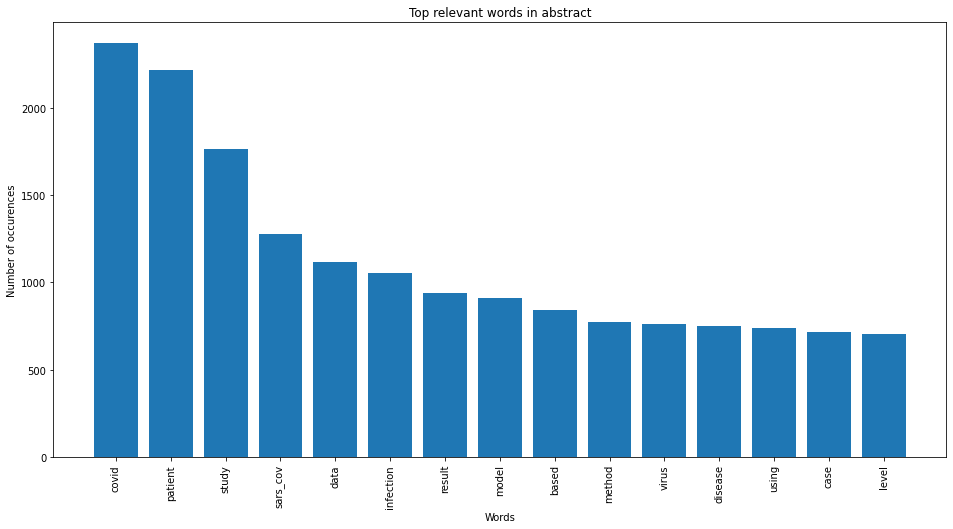

In [55]:
countVectorizer = CountVectorizer(stop_words='english')
words, wordValues = getTopNWordsVis(nTopWords=15,
                                     countVectorizer=countVectorizer, 
                                     textData=abstractDataRelWords)

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), wordValues);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top relevant words in abstract');
ax.set_xlabel('Words');
ax.set_ylabel('Number of occurences');
plt.show()

### Creating Dictionary and Corpus for gensim models

In [119]:
# Create Dictionary
id2word = gensim.corpora.Dictionary(abstractDataLemmatized)

# Create Corpus
texts = abstractDataLemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[0])

[(0, 2), (1, 2), (2, 1), (3, 1), (4, 2), (5, 1), (6, 2), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 2), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 6), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 2), (41, 1), (42, 3), (43, 1), (44, 1), (45, 2), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 3), (57, 2), (58, 1), (59, 3), (60, 3), (61, 5), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 3), (68, 2), (69, 1), (70, 1), (71, 2), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 2), (83, 1), (84, 1), (85, 1), (86, 7), (87, 1), (88, 1), (89, 2), (90, 1), (91, 1), (92, 1), (93, 1)]


In [118]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('ability', 2),
  ('across', 2),
  ('administered', 1),
  ('age_group', 1),
  ('age_sex', 2),
  ('alaskan', 1),
  ('alcohol', 2),
  ('american', 2),
  ('among', 1),
  ('asian', 1),
  ('better', 1),
  ('black', 1),
  ('calculated', 1),
  ('case', 1),
  ('cigarette', 1),
  ('comparative', 1),
  ('comparison', 1),
  ('condition', 1),
  ('contributed', 1),
  ('could', 1),
  ('data', 2),
  ('data_collection', 1),
  ('demographic', 1),
  ('derive', 1),
  ('design', 1),
  ('detect', 1),
  ('difference', 2),
  ('draw', 1),
  ('drug', 1),
  ('effective', 1),
  ('enhancing', 1),
  ('epidemiologic', 1),
  ('estimate', 6),
  ('evaluation', 1),
  ('finding', 1),
  ('followed', 1),
  ('future', 1),
  ('general', 1),
  ('greatest', 1),
  ('group', 1),
  ('health', 2),
  ('higher', 1),
  ('hispanic', 3),
  ('iii', 1),
  ('important', 1),
  ('improve', 2),
  ('intervention', 1),
  ('level', 1),
  ('limiting', 1),
  ('many', 1),
  ('marijuana', 1),
  ('may', 1),
  ('medical', 1),
  ('member', 1),
  ('

### Finding optimum number of clusters for LSA using coherance score

In [113]:
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=num_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

/Users/swathipathaikara/Desktop/DCSI/MlTrialPgms/ObjectDetection/action/lib/python3.9/site-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
/Users/swathipathaikara/Desktop/DCSI/MlTrialPgms/ObjectDetection/action/lib/python3.9/site-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
/Users/swathipathaikara/Desktop/DCSI/MlTrialPgms/ObjectDetection/action/lib/python3.9/site-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
/Users/swathipathaikara/Desktop/DCSI/MlTrialPgms/ObjectDetection/action/lib/python3.9/site-packages/gensim/models/lsim

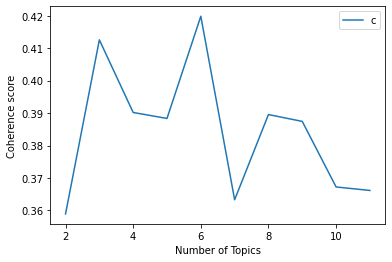

In [114]:
def plot_graph(doc_clean,start, stop, step):
    #dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    dictionary = id2word
    doc_term_matrix = corpus
    doc_clean = abstractDataLemmatized
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

start,stop,step=2,12,1
plot_graph(abstractDataLemmatized,start,stop,step)

### Creating LSA with gensim

In [123]:
from gensim.models import LsiModel
lsaModelGensim = gensim.models.LsiModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=6, 
                                           chunksize=100,
                                        )

/Users/swathipathaikara/Desktop/DCSI/MlTrialPgms/ObjectDetection/action/lib/python3.9/site-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
/Users/swathipathaikara/Desktop/DCSI/MlTrialPgms/ObjectDetection/action/lib/python3.9/site-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
/Users/swathipathaikara/Desktop/DCSI/MlTrialPgms/ObjectDetection/action/lib/python3.9/site-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
/Users/swathipathaikara/Desktop/DCSI/MlTrialPgms/ObjectDetection/action/lib/python3.9/site-packages/gensim/models/lsim

In [124]:
docLsa = lsaModelGensim[corpus]

In [126]:
coherenceModelLsa = gensim.models.CoherenceModel(model=lsaModelGensim, texts=abstractDataLemmatized, dictionary=id2word, coherence='c_v')
coherenceLsa = coherenceModelLsa.get_coherence()
print('\nCoherence Score: ', coherenceLsa)


Coherence Score:  0.4318993988046089


### Finding optimum clusters for LDA using coherance score 

In [152]:
def compute_coherence_values_lda(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = gensim.models.ldamodel.LdaModel(doc_term_matrix, num_topics=num_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

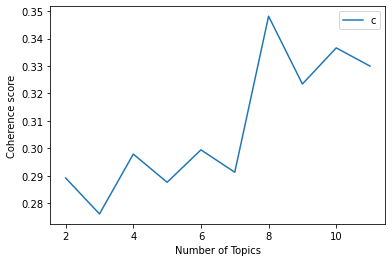

In [163]:
def plot_graph_lda(doc_clean,start, stop, step):
    #dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    dictionary = id2word
    doc_term_matrix = corpus
    doc_clean = abstractDataLemmatized
    model_list, coherence_values = compute_coherence_values_lda(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

start,stop,step=2,12,1
plot_graph_lda(abstractDataLemmatized,start,stop,step)

### Creating gensim LDA model

In [164]:
ldaModelGensim = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=8, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True
                                        )

In [165]:
docLda = ldaModelGensim[corpus]

In [166]:
print('\nPerplexity: ', ldaModelGensim.log_perplexity(corpus))  # measure of how good the model is. lower is the better.

coherenceModelLda = gensim.models.CoherenceModel(model=ldaModelGensim, texts=abstractDataLemmatized, dictionary=id2word, coherence='c_v')
coherenceLda = coherenceModelLda.get_coherence()
print('\nCoherence Score: ', coherenceLda)



Perplexity:  -8.86032551872092

Coherence Score:  0.4549416070100578


In [167]:
%%time
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(ldaModelGensim, corpus, id2word)
vis

/Users/swathipathaikara/Desktop/DCSI/MlTrialPgms/ObjectDetection/action/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


CPU times: user 446 ms, sys: 28.2 ms, total: 474 ms
Wall time: 828 ms


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.193807  0.107101       1        1  30.557076
4     -0.209215 -0.102324       2        1  20.877110
5     -0.018549  0.074797       3        1  12.727240
3     -0.081980  0.121222       4        1  11.889618
6     -0.039893 -0.301450       5        1   9.293283
1      0.073134  0.157904       6        1   6.769141
2      0.261054 -0.017748       7        1   6.557359
7      0.209255 -0.039503       8        1   1.329173, topic_info=                  Term         Freq        Total Category  logprob  loglift
448            patient  2067.000000  2067.000000  Default  30.0000  30.0000
407              covid  2206.000000  2206.000000  Default  29.0000  29.0000
441              model   875.000000   875.000000  Default  28.0000  28.0000
163            protein   659.000000   659.000000  Default  27.0000  27.0000
273           sars_cov  1188.000000  1188.000000  Default  26.0000  26.0000
...                ...          ...          ...      ...      ...      ...
8021  creative_commons    12.242880    13.114060   Topic8  -5.6928   4.2519
2951        restaurant    11.863826    12.738370   Topic8  -5.7243   4.2495
5178             graph    11.760325    12.632228   Topic8  -5.7330   4.2491
3868         emergency    26.816270   130.317808   Topic8  -4.9088   2.7396
1247              wave    18.117120    50.542666   Topic8  -5.3009   3.2947

[469 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
7027      7  0.978372         ab
3755      1  0.993592     access
1185      6  0.996172   accuracy
195       3  0.923631        ace
195       7  0.072442        ace
...     ...       ...        ...
702       5  0.025042       well
703       7  0.988772  wild_type
93        1  0.923929       work
93        6  0.075624       work
1248      8  0.938916     worked

[731 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 6, 4, 7, 2, 3, 8])

### Creating LSA Model with sklearn library

In [116]:
abstractCountVectorizer = CountVectorizer(stop_words='english', max_features=40000)
abstractTextSample = abstractDataRelWords.sample(n=1000, random_state=0).values

print('Abstract before vectorization: \n{}'.format(abstractTextSample[123]))

abstractDocumentTermMatrix = abstractCountVectorizer.fit_transform(abstractTextSample)

print('Abstract after vectorization: \n{}'.format(abstractDocumentTermMatrix[123]))

Abstract before vectorization: 
 background coronavirus_disease covid_pandemic may altered emergency workflow established optimize outcome patient large vessel occlusion lvo stroke aim analyzed workflow time interval functional outcome lvo patient treated endovascular thrombectomy et covid_pandemic germany compared frequency pre intrahospital workflow time interval rate reperfusion functional outcome patients_admitted march st may st patients_admitted time interval university municipal hospital across germany result number lvo patient treated et march may similar compared interval direct center patient patients_admitted interhospital transfer showed similar pre intrahospital workflow time interval compared patients_admitted except longer door groin time patients_admitted interhospital transfer min v min rate reperfusion significantly different functional outcome discharge lvo patient treated significantly different compared patient treated conclusion pre intrahospital workflow et effic

In [168]:
nTopicsLsa = 6
lsaModel = TruncatedSVD(n_components=nTopicsLsa)
lsaTopicMatrix = lsaModel.fit_transform(abstractDocumentTermMatrix)

In [169]:
import math
avg_coherence = get_average_topic_coherence(abstractDocumentTermMatrix, lsaModel.components_, 10)
print(str(avg_coherence))

-55.362963712596695


In [170]:
# for a given topic matrix, this helper function gives an integer list of predicted topic categories
def getKeys(topicMatrix):
    keys = topicMatrix.argmax(axis=1).tolist()
    return keys

# for a given list of keys, this helper function gives a tuple of topic categories and their accompanying magnitudes
def keysToCounts(keys):
    countPairs = Counter(keys).items()
    categories = [pair[0] for pair in countPairs]
    counts = [pair[1] for pair in countPairs]
    return (categories, counts)

lsaKeys = getKeys(lsaTopicMatrix)
lsaCategories, lsaCounts = keysToCounts(lsaKeys)

In [171]:
# Define helper functions
def getTopNWords(n, keys, documentTermMatrix, countVectorizer):
    topWordIndices = []
    for topic in range(nTopicsLsa):
        tempVectorSum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                tempVectorSum += documentTermMatrix[i]
        tempVectorSum = tempVectorSum.toarray()
        topNWordIndices = np.flip(np.argsort(tempVectorSum)[0][-n:],0)
        topWordIndices.append(topNWordIndices)   
    topWords = []
    for topic in topWordIndices:
        topicWords = []
        for index in topic:
            tempWordVector = np.zeros((1,documentTermMatrix.shape[1]))
            tempWordVector[:,index] = 1
            theWord = countVectorizer.inverse_transform(tempWordVector)[0][0]
            topicWords.append(theWord.encode('ascii').decode('utf-8'))
        topWords.append(" ".join(topicWords))         
    return topWords

In [172]:
topNWordsLsa = getTopNWords(15, lsaKeys, abstractDocumentTermMatrix, abstractCountVectorizer)

for i in range(len(topNWordsLsa)):
    print("Topic {}: ".format(i+1), topNWordsLsa[i])


Topic 1:  covid patient study sars_cov infection data model result based disease method level time pandemic use
Topic 2:  protein cell structure virus domain dna infection viral ifn apn activity expression hap mechanism binding
Topic 3:  burgio orfali rateb use narbay alhadrami jiffri pcr yaseen scale barcoding combined hellberg thissera sayed
Topic 4:  sars_cov rapid_antigen parison newly_identified analytical sensitivity coronavirus kit detection detecting favored fav favorable favor favoring
Topic 5:  ebov network vp ebov_polymerase viral transplantation diabetic pancreas_transplantation self_healing deliberation et_al patient recommendation plane pta
Topic 6:  la el covid et_al en se del los imagenes ia entre articulo para de_la cribado


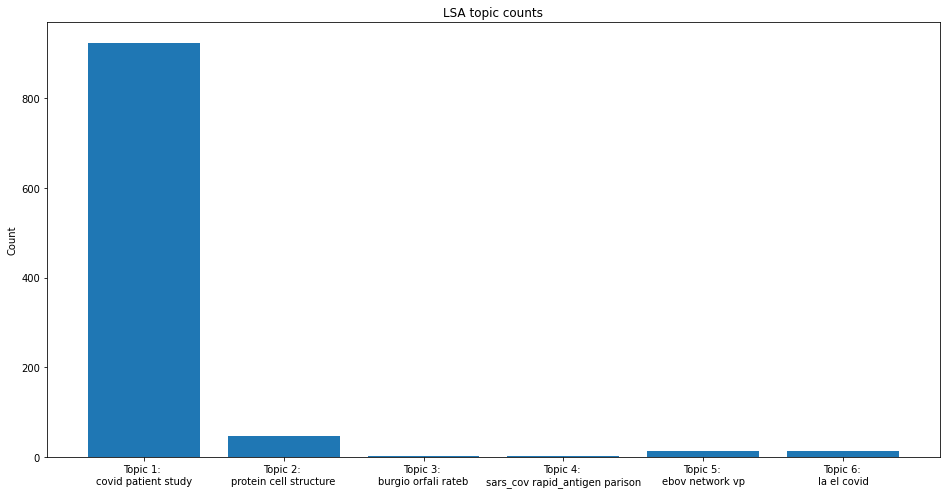

In [209]:
top3Words = getTopNWords(3, lsaKeys, abstractDocumentTermMatrix, abstractCountVectorizer)
labels = ['Topic {}: \n'.format(i+1) + top3Words[i] for i in lsaCategories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsaCategories, lsaCounts);
ax.set_xticks(lsaCategories);
ax.set_xticklabels(labels);
ax.set_ylabel('Count');
ax.set_title('LSA topic counts');
plt.show()

In [174]:
from sklearn.manifold import TSNE
tsneLsaModel = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsneLsaVectors = tsneLsaModel.fit_transform(lsaTopicMatrix)

/Users/swathipathaikara/Desktop/DCSI/MlTrialPgms/ObjectDetection/action/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.002s...
[t-SNE] Computed neighbors for 1000 samples in 0.053s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.549965
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.222252
[t-SNE] KL divergence after 1850 iterations: 0.664583


In [175]:
def getMeanTopicVectors(keys, twoDimVectors):
    '''
    returns a list of centroid vectors from each predicted topic category
    '''
    meanTopicVectors = []
    for t in range(nTopicsLsa):
        articlesInTheTopic = []
        for i in range(len(keys)):
            if keys[i] == t:
                articlesInTheTopic.append(twoDimVectors[i])    
        
        articlesInTheTopic = np.vstack(articlesInTheTopic)
        meanArticlesInTheTopic = np.mean(articlesInTheTopic, axis=0)
        meanTopicVectors.append(meanArticlesInTheTopic)
    return meanTopicVectors

In [176]:
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap = colormap[:nTopicsLsa]

In [177]:
top3WordsLsa = getTopNWords(3, lsaKeys, abstractDocumentTermMatrix, abstractCountVectorizer)
lsaMeanTopicVectors = getMeanTopicVectors(lsaKeys, tsneLsaVectors)

plot = figure(title="t-SNE Clustering of {} LSA Topics".format(nTopicsLsa), plot_width=700, plot_height=700)
plot.scatter(x=tsneLsaVectors[:,0], y=tsneLsaVectors[:,1], color=colormap[lsaKeys])

for t in range(nTopicsLsa):
    label = Label(x=lsaMeanTopicVectors[t][0], y=lsaMeanTopicVectors[t][1], 
                  text=top3WordsLsa[t], text_color=colormap[t])
    plot.add_layout(label)
    
show(plot)

### Creating LDA model with sklearn library

In [182]:
nTopicsLda = 8
ldaModelSklearn = LatentDirichletAllocation(n_components=nTopicsLda, learning_method='online', 
                                          random_state=0, verbose=0)
ldaTopicMatrix = ldaModelSklearn.fit_transform(abstractDocumentTermMatrix)

In [183]:
import math
avg_coherence = get_average_topic_coherence(abstractDocumentTermMatrix, ldaModelSklearn.components_, 10)
print(str(avg_coherence))

-50.04600124117935


In [184]:
ldaKeys = getKeys(ldaTopicMatrix)
ldaCategories, ldaCounts = keysToCounts(ldaKeys)

In [188]:
# Define helper functions
def getTopNWords_lda(n, keys, documentTermMatrix, countVectorizer):
    topWordIndices = []
    for topic in range(nTopicsLda):
        tempVectorSum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                tempVectorSum += documentTermMatrix[i]
        tempVectorSum = tempVectorSum.toarray()
        topNWordIndices = np.flip(np.argsort(tempVectorSum)[0][-n:],0)
        topWordIndices.append(topNWordIndices)   
    topWords = []
    for topic in topWordIndices:
        topicWords = []
        for index in topic:
            tempWordVector = np.zeros((1,documentTermMatrix.shape[1]))
            tempWordVector[:,index] = 1
            theWord = countVectorizer.inverse_transform(tempWordVector)[0][0]
            topicWords.append(theWord.encode('ascii').decode('utf-8'))
        topWords.append(" ".join(topicWords))         
    return topWords

In [190]:
topNWordsLda = getTopNWords_lda(10, ldaKeys, abstractDocumentTermMatrix, abstractCountVectorizer)

for i in range(len(topNWordsLda)):
    print("Topic {}: ".format(i+1), topNWordsLda[i])

Topic 1:  sars_cov cell protein infection virus study covid human viral disease
Topic 2:  le la covid en de_la aki pour et para se
Topic 3:  property film silver polyethylene silver_nanoparticles material low scanning gamma field
Topic 4:  pair textile number potassium neutrosophic set km trna examples_yield ctl
Topic 5:  study health patient care covid research participant intervention pandemic need
Topic 6:  patient covid study model data infection result sars_cov time method
Topic 7:  covid tb et_al bcg pubmed bu patient vaccination olan yuksek
Topic 8:  mecp patient cell organic mouse neurosyphilis cd di flx covid


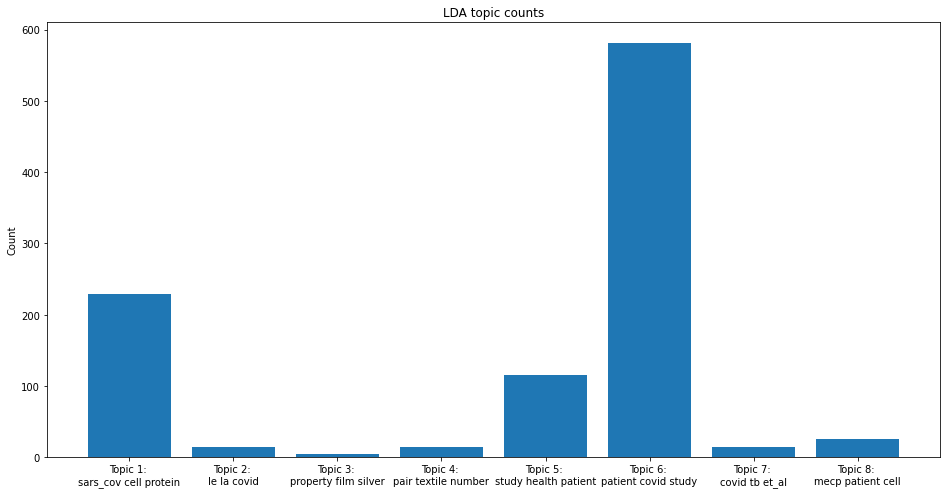

In [210]:
top3Words = getTopNWords_lda(3, ldaKeys, abstractDocumentTermMatrix, abstractCountVectorizer)
labels = ['Topic {}: \n'.format(i+1) + top3Words[i] for i in ldaCategories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(ldaCategories, ldaCounts);
ax.set_xticks(ldaCategories);
ax.set_xticklabels(labels);
ax.set_title('LDA topic counts');
ax.set_ylabel('Count');

In [192]:
tsneLdaModel = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsneLdaVectors = tsneLdaModel.fit_transform(ldaTopicMatrix)

/Users/swathipathaikara/Desktop/DCSI/MlTrialPgms/ObjectDetection/action/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.003s...
[t-SNE] Computed neighbors for 1000 samples in 0.040s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.001518
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.838615
[t-SNE] KL divergence after 1150 iterations: 0.238993


In [204]:
def getMeanTopicVectors_lda(keys, twoDimVectors):
    '''
    returns a list of centroid vectors from each predicted topic category
    '''
    meanTopicVectors = []
    for t in range(nTopicsLda):
        articlesInTheTopic = []
        for i in range(len(keys)):
            if keys[i] == t:
                articlesInTheTopic.append(twoDimVectors[i])    
        
        articlesInTheTopic = np.vstack(articlesInTheTopic)
        meanArticlesInTheTopic = np.mean(articlesInTheTopic, axis=0)
        meanTopicVectors.append(meanArticlesInTheTopic)
    return meanTopicVectors

In [205]:
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap = colormap[:nTopicsLda]

In [208]:
top3WordsLda = getTopNWords_lda(3, ldaKeys, abstractDocumentTermMatrix, abstractCountVectorizer)
ldaMeanTopicVectors = getMeanTopicVectors_lda(ldaKeys, tsneLdaVectors)

plot = figure(title="t-SNE Clustering of {} LDA Topics".format(nTopicsLda), plot_width=700, plot_height=700)
plot.scatter(x=tsneLdaVectors[:,0], y=tsneLdaVectors[:,1], color=colormap[ldaKeys])

for t in range(nTopicsLda):
    label = Label(x=ldaMeanTopicVectors[t][0], y=ldaMeanTopicVectors[t][1], 
                  text=top3WordsLda[t], text_color=colormap[t])
    plot.add_layout(label)

show(plot)

### Top2Vec

In [94]:
df = pd.DataFrame(abstractDataRelWords)
df.columns =['abstract']
mystopwords = set(stopwords.words('english'))
df['fully_cleaned_abstract'] = df['abstract'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in mystopwords]))

df.to_csv('top2vecDoc.csv', index=False)

In [96]:
def get_umass_score(dt_matrix, i, j):
    zo_matrix = (dt_matrix > 0).astype(int)
    col_i, col_j = zo_matrix[:, i], zo_matrix[:, j]
    col_ij = col_i + col_j
    col_ij = (col_ij == 2).astype(int)    
    Di, Dij = col_i.sum(), col_ij.sum()    
    return math.log((Dij + 1) / Di)

def get_topic_coherence(dt_matrix, topic, n_top_words):
    indexed_topic = zip(topic, range(0, len(topic)))
    topic_top = sorted(indexed_topic, key=lambda x: 1 - x[0])[0:n_top_words]
    coherence = 0
    for j_index in range(0, len(topic_top)):
        for i_index in range(0, j_index - 1):
            i = topic_top[i_index][1]
            j = topic_top[j_index][1]
            coherence += get_umass_score(dt_matrix, i, j)
    return coherence

def get_average_topic_coherence(dt_matrix, topics, n_top_words):
    total_coherence = 0
    for i in range(0, len(topics)):
        total_coherence += get_topic_coherence(dt_matrix, topics[i], n_top_words)
    return total_coherence / len(topics)